In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


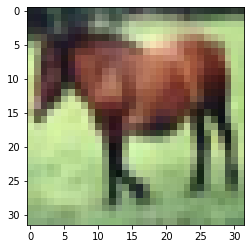

In [3]:
plt.imshow(x_train[7])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 1:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
ماتریس های تصویر را تبدیل به نوع داده ای float32 کنید و مقادیر پیکسل ها را نرمال کنید و بین 0 و 1 بیاورید.
<br>
<b>راهنمایی: </b>
شما باید متد astype را صدا بزنید و در نهایت مقادیر پیکسل ها را تقسیم بر 255 کنید.</div>

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 2:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
همان طور که میبینید لیبل ها از نوع عددی هستند. آن ها را تبدیل به فرمت one-hot کنید.<br>
</div>


<hr>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها قبل از تبدیل به فرمت one-hot:</div>

In [ ]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [5]:
y_train =  keras.utils.to_categorical(y_train, num_classes=10)
y_test  =  keras.utils.to_categorical(y_test, num_classes=10)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها بعد از تبدیل به فرمت one-hot:</div>

In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 3:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
یک شبکه کانولوشنالی با معماری زیر بسازید:
<ul>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با64 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    استفاده از لایه ی Flatten() . به نظرتون چرا؟
    </li>    
    <li>
    یک لایه Dropout با ترخ 0.5.
    </li>
    <li>
    یک لایه softmax برای احتمالات خروجی. به نظرتون این لایه چند نوران میخواهد؟
    </li>    
 
</ul>
</div>


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Flatten())           # because we want to add classifier layer 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # 10 neuron, because we have 10 class in our dataset

In [ ]:
opt  = keras.optimizers.Adam(learning_rate=0.0001)
loss = keras.losses.CategoricalCrossentropy()
es   = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
check_point = keras.callbacks.ModelCheckpoint(monitor='val_loss',
                                              filepath='model/weights.h5',
                                              verbose=1,
                                              save_best_only=True,
                                              mode='min')
model.compile(optimizer=opt, loss=loss, metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=150, verbose=1, callbacks=[es, check_point], validation_data=(x_test, y_test))

Epoch 1/150
782/782 [==============================] - ETA: 0s - loss: 1.8895 - acc: 0.3119
Epoch 00001: val_loss improved from inf to 1.61486, saving model to model/weights.h5
782/782 [==============================] - 14s 15ms/step - loss: 1.8895 - acc: 0.3119 - val_loss: 1.6149 - val_acc: 0.4289
Epoch 2/150
778/782 [============================>.] - ETA: 0s - loss: 1.5854 - acc: 0.4269
Epoch 00002: val_loss improved from 1.61486 to 1.47871, saving model to model/weights.h5
782/782 [==============================] - 8s 10ms/step - loss: 1.5849 - acc: 0.4270 - val_loss: 1.4787 - val_acc: 0.4728
Epoch 3/150
778/782 [============================>.] - ETA: 0s - loss: 1.4801 - acc: 0.4681
Epoch 00003: val_loss improved from 1.47871 to 1.40672, saving model to model/weights.h5
782/782 [==============================] - 8s 11ms/step - loss: 1.4800 - acc: 0.4681 - val_loss: 1.4067 - val_acc: 0.5038
Epoch 4/150
779/782 [============================>.] - ETA: 0s - loss: 1.4093 - acc: 0.4961
Ep

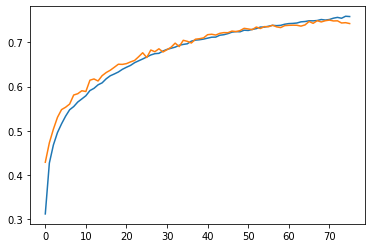

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

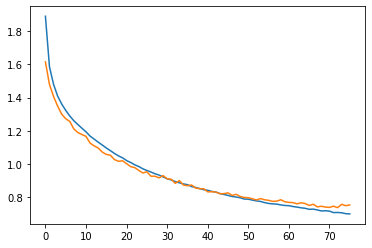

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7537 - acc: 0.7428


[0.7536700367927551, 0.7427999973297119]

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 6:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
شبکه و هایپرپارامترهای این شبکه را به هر نحوی دوست دارید تغییر دهید تا دقت روی دادگان تست را به حداکثر برسانید.
</div>


# best hyper parametrs without overfitting:
oprimizer: adam, 0.0001

batch size: 64